# **Lightning Strikes 2**

This notebook uses a file called eda_manipulate_date_strings_with_python.csv, which comes from the bigquery-public-data.noaa_lightning.lightning_strikes public data table. It contains cloud-to-ground lightning strike information collected by Vaisala's National Lightning Detection Network (NLDN) and aggregated into 0.1° tiles by the National Centers for Environmental Information.

Throughout this notebook, we will practice manipulating date strings in Python.  We will work with the first 6 months of 2016's lightning strike data from the National Oceanic and Atmospheric Association (NOAA) to calculate weekly sums of lightning strikes and plot them on a bar graph. Then, we will calculate quarterly lightning strike totals and plot them on bar graphs.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('/Users/timothypark/Documents/portfolios/timpark99.github.io/Lightning Strikes 2/eda_manipulate_date_strings_with_python.csv')

In [3]:
df.head()

,date,number_of_strikes,center_point_geom
0,1/1/16,1,POINT(-51.6 43.3)
1,1/1/16,1,POINT(-74.5 34.4)
2,1/1/16,1,POINT(-77.8 32)
3,1/1/16,1,POINT(-77.1 33.2)
4,1/1/16,1,POINT(-76.5 33.7)


## Create new time columns
As with similar datasets you have worked with, the `date` column data type is a string object, which limits what you can do with the data in this column. Converting the column to datetime will enable you to work with this data much more easily.  

In [5]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date'])

/var/folders/5z/f5jycvmd0x58dvn1by8xk79h0000gn/T/ipykernel_41188/1069994018.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


Next, let's create four new columns: `week`, `month`, `quarter`, and `year`. We can do this by using the `datetime.strftime()` method of the datetime object. `strftime` is short for "string format time." We will use this method on the datetime data in the `week` column, and it will extract the information we specify, formatted as a string. 

To specify the information to extract, we will use strftime format codes. You can find a full list of available codes to use in the [strftime format codes documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior). In this case, we will use `%Y` for year, `%V` for week number, `%q` for quarter.

In [7]:
# Create four new columns.
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

df.head()

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-01-01,1,POINT(-51.6 43.3),2016-W53,2016-01,2016-Q1,2016
1,2016-01-01,1,POINT(-74.5 34.4),2016-W53,2016-01,2016-Q1,2016
2,2016-01-01,1,POINT(-77.8 32),2016-W53,2016-01,2016-Q1,2016
3,2016-01-01,1,POINT(-77.1 33.2),2016-W53,2016-01,2016-Q1,2016
4,2016-01-01,1,POINT(-76.5 33.7),2016-W53,2016-01,2016-Q1,2016


## Plot the number of weekly lightning strikes
Next, we will plot the number of weekly lightning strikes. We will use the `groupby()` and `sum()` functions to get the number of strikes per week.

In [9]:
df_by_week = df.groupby(['week']).sum(numeric_only=True).reset_index()
df_by_week.head()

,week,number_of_strikes
0,2016-W01,10097
1,2016-W02,10061
2,2016-W03,10029
3,2016-W04,2314
4,2016-W05,7441


Now we have a table of exactly what we need to plot the weekly lightning strike totals. We will use the `plt.bar()` function to plot the bar graph. Within the argument field, let's input the x-axis (the `week` column), then input the y-axis (or height) as the `number_of_strikes` column. 

We will use `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` to add appropriate text to the graph.

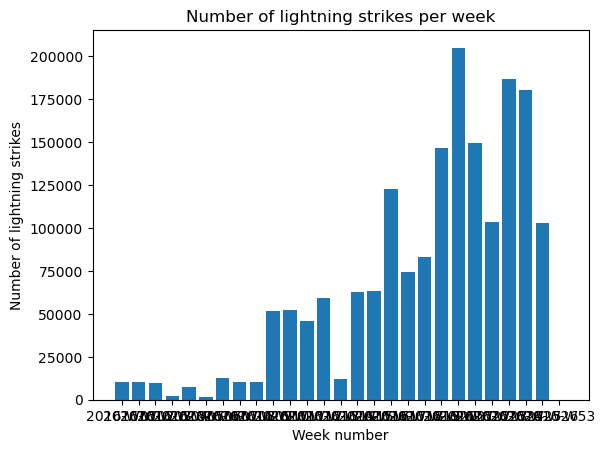

In [11]:
# Plot a bar graph of weekly strike totals.
plt.bar(x = df_by_week['week'], height = df_by_week['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week");

### Adjust the graph size
We now have a graph, but we can't read the x-axis labels. To fix this problem, first we will make it bigger by using `plt.figure(figsize=(20, 5))`. This will change the size to 20 inches wide by 5 inches tall.

Next, we will use the `plt.xticks()` function to access the tick labels on the x-axis. Using the `rotation` and `fontsize` keyword arguments, rotate the labels and make the font smaller.

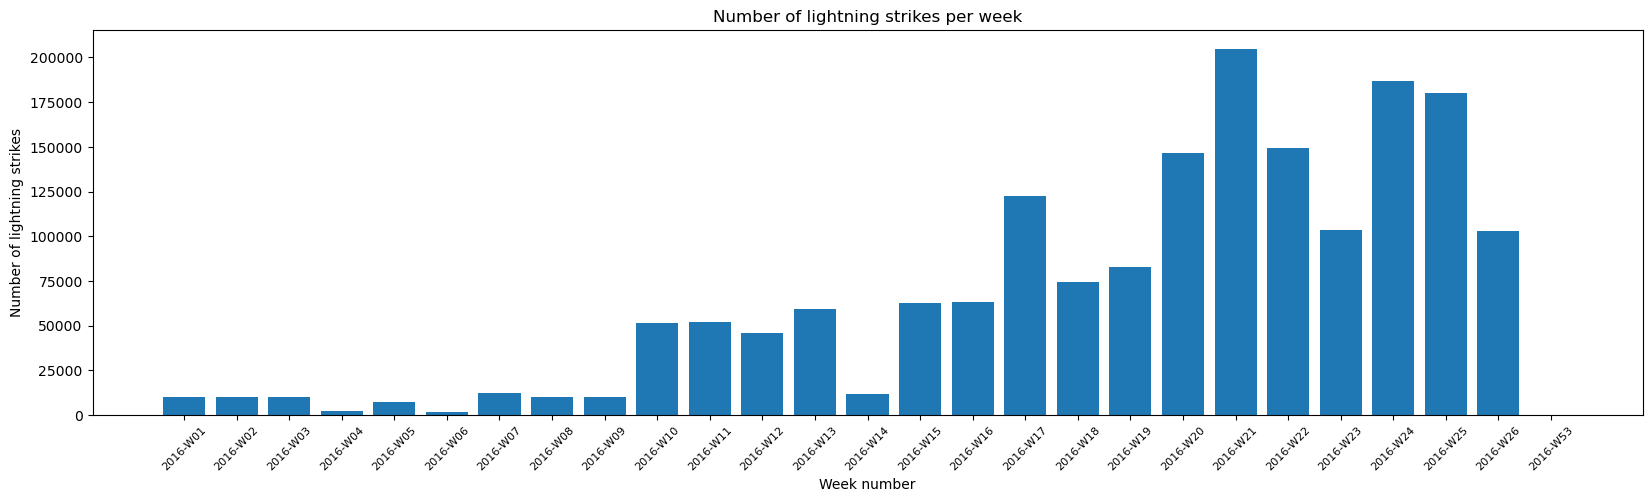

In [13]:
plt.figure(figsize = (20, 5)) # Increase output size.
plt.bar(x = df_by_week['week'], height = df_by_week['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week")
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size.

plt.show()

## Plot the number of monthly lightning strikes
Next, let's plot lightning strikes by month. For a visualization, it will be easiest to work with numbers in thousands, such as 25.2 thousand. As an example, the following code will divide the `number_of_strikes` column by one thousand.

In [15]:
df_by_month = df['number_of_strikes'].div(1000)
df_by_month.head()

0    0.001
1    0.001
2    0.001
3    0.001
4    0.001
Name: number_of_strikes, dtype: float64

### Format the numbers
This alone does not help much, because it just moved the decimal to the left. We will need to format the numbers as well.  Let's begin by grouping the data by month and summing.

Then, we will create a `number_of_strikes_formatted` column in the resulting dataframe by dividing by one thousand but also rounding to one digit after the decimal point, converting it to a string, and adding "K" to the end to represent thousands.

In [17]:
df_by_month = df.groupby(['month']).sum(numeric_only=True).reset_index()

# Format as text, in thousands.
df_by_month['number_of_strikes_formatted'] = df_by_month['number_of_strikes'].div(1000).round(1).astype(str) + 'K'

df_by_month.head(6)

,month,number_of_strikes,number_of_strikes_formatted
0,2016-01,32573,32.6K
1,2016-02,31652,31.7K
2,2016-03,200948,200.9K
3,2016-04,266221,266.2K
4,2016-05,579406,579.4K
5,2016-06,665369,665.4K


### Add labels
Before we start plotting, let's write a function that will help label each bar in the plot with its corresponding number_of_strikes_formatted text. The function uses `plt.text()`, which is a pyplot function whose positional arguments are `x`, `y`, and `s`. `x` represents the x-axis coordinates, `y` represents the y-axis coordinates, and `s` represents the text that we want to appear at these coordinates. 

**Reference:** [pyplot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html).

In [19]:
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        # ha and va are horizontal and vertical alignment
        # in plt.text, i is the x position, y[i] is the y position and labels[i] is what's being displayed
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

### Plot the bar graph

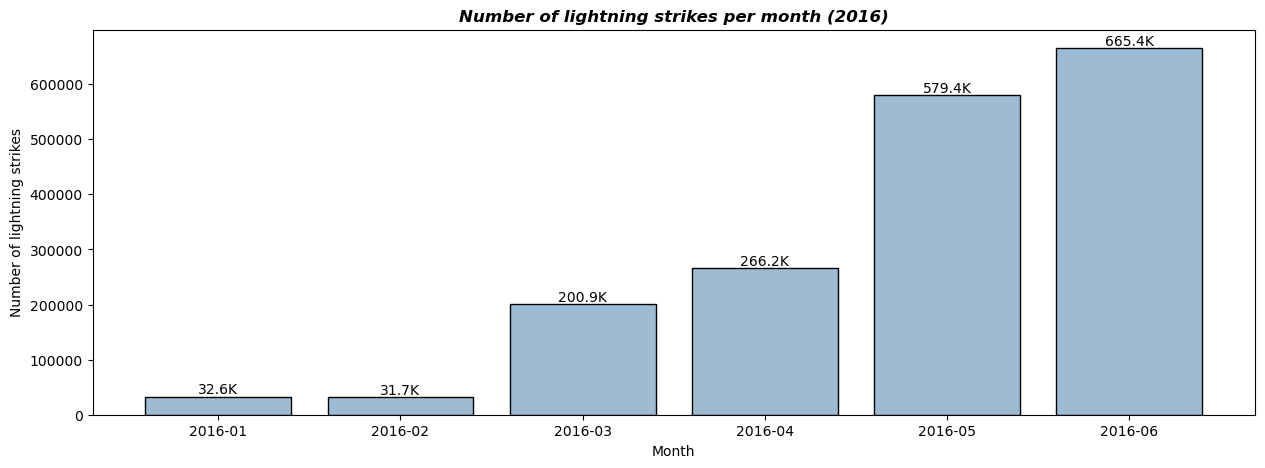

In [21]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_month['month'], height = df_by_month['number_of_strikes'], edgecolor='black', color='xkcd:light gray blue')
addlabels(df_by_month['month'], df_by_month['number_of_strikes'], df_by_month['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Month')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per month (2016)', fontweight='bold', fontstyle='italic')
plt.show()

### Create a grouped bar chart
Now, we will create a grouped bar chart to better compare month-over-month changes each week. We can do this by creating two new columns that break out the week and month from the `week` column. We will use the `quarter` column and take the last two characters to get `quarter_number`, and take the first four characters to get `year`.

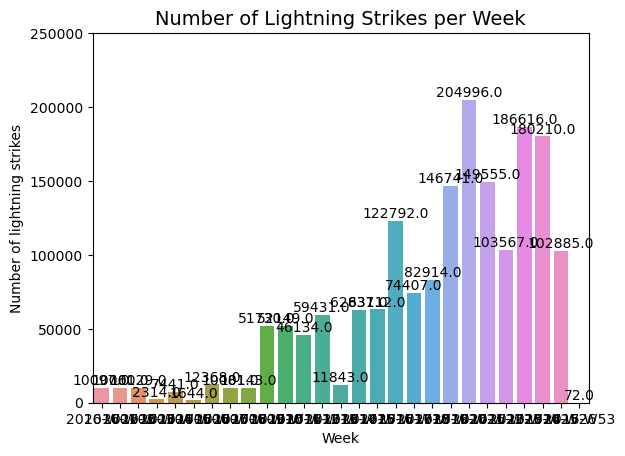

In [50]:
# Create two new columns.
# df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
# df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
# df_by_quarter.head()

# errorbar=None gets rid of the confidence interval line
# in seaborn there's no direct way to put numbers on top of bars so we need to use a for loop

sns.barplot(x="week", y="number_of_strikes", data=df_by_week, errorbar=None)

# gca stands for get current axis.  The patches refer to each bar
# get_x gets us to the bottom left corner of the bar but we need to get to the middle so we add bar.get_width()/2
for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x()+bar.get_width()/2, bar.get_height(), str(round(bar.get_height(), 2)), ha='center', va='bottom')

plt.title("Number of Lightning Strikes per Week", fontsize=14)
plt.xlabel("Week")
plt.ylabel("Number of lightning strikes")
plt.ylim(0, 250000)
plt.show()